In [1]:
import pandas as pd
import yfinance as yf

In [2]:
ticker = yf.Tickers(["LABB.MX", "VESTA.MX", "ORBIA.MX", "GFNORTEO.MX", "BBAJIOO.MX", "MEGACPO.MX",
                     "AC.MX", "GCC.MX", "GENTERA.MX", "CUERVO.MX", "AMXB.MX", "GCARSOA1.MX",
                     "KIMBERA.MX", "GMEXICOB.MX", "CHDRAUIB.MX", "GRUMAB.MX", "KOFUBL.MX",
                     "RA.MX", "BOLSAA.MX", "ALSEA.MX", "TLEVISACPO.MX", "Q.MX", "BIMBOA.MX",
                     "PINFRA.MX", "GAPB.MX", "ASURB.MX", "OMAB.MX", "CEMEXCPO.MX"])
data = ticker.history(start= '2015-01-01', end= '2023-12-31', interval='1mo')['Close']

data.head()

[*********************100%***********************]  28 of 28 completed


Ticker,AC.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,CUERVO.MX,...,KOFUBL.MX,LABB.MX,MEGACPO.MX,OMAB.MX,ORBIA.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.702614,37.795326,11.671398,152.225357,NaN,34.200211,15.430021,11.531771,37.656040,NaN,...,NaN,19.345699,38.958511,38.346146,32.615501,130.751801,NaN,56.302021,88.730598,23.547865
2015-02-01 00:00:00+00:00,70.285492,43.193317,11.671398,159.254837,NaN,37.858753,16.780148,13.125944,44.382278,NaN,...,NaN,13.299149,39.022587,39.573227,34.200764,138.726151,NaN,57.645134,92.414078,23.328474
2015-03-01 00:00:00+00:00,69.477196,42.006329,11.124300,159.635452,NaN,38.791317,16.133081,12.536795,41.835011,NaN,...,NaN,11.775290,42.517670,41.436150,31.358217,126.094238,NaN,56.418163,91.677376,23.035957
2015-04-01 00:00:00+00:00,69.892456,43.400570,11.737051,168.668915,NaN,36.944115,18.360481,13.335611,41.735294,NaN,...,NaN,14.749669,45.450420,42.735737,34.585354,136.695770,NaN,63.874283,101.554527,23.328474
2015-05-01 00:00:00+00:00,70.519684,43.626663,11.744344,176.417740,NaN,37.374535,16.991686,12.993212,42.756985,NaN,...,NaN,13.535470,46.048355,40.197922,36.726284,130.000076,NaN,61.689007,105.901932,22.910900


In [3]:
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)

In [4]:
data = data.melt(ignore_index=False)

In [5]:
df = pd.DataFrame({"ds": data.index,
                   "y": data['value'],
                   "unique_id": data['Ticker']})
df.reset_index(drop=True, inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
train = df[df.ds<'2023-01-01']
test = df[df.ds>='2023-01-01']

In [10]:
from statsforecast.models import AutoETS
from statsforecast import StatsForecast

c:\Users\esteb\.conda\envs\ITESO\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
season_length = 12 # Monthly data
horizon = len(test['ds'].unique()) # number of predictions

models = [AutoETS(season_length=season_length, model='ZZZ')]

In [12]:
sf = StatsForecast(df=train,
                   models=models,
                   freq='MS', 
                   n_jobs=-1)

c:\Users\esteb\.conda\envs\ITESO\lib\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [13]:
sf.fit()

c:\Users\esteb\.conda\envs\ITESO\lib\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoETS])

In [14]:
test_hat = sf.forecast(fitted = True ,h=horizon)

c:\Users\esteb\.conda\envs\ITESO\lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [16]:
train_hat = sf.forecast_fitted_values()

c:\Users\esteb\.conda\envs\ITESO\lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [17]:
def model_evaluation(y_true, y_pred, stocks): 
    errors_df = pd.DataFrame(columns=['MAPE'], index=stocks)
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred) 
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
    
    for stock in stocks: 
        y_true_stock = y_true[y_true['unique_id'] == stock]['y'] 
        y_pred_stock = y_pred[test_hat.index == stock]['AutoETS'] 
        print(f"MAPE score for {stock}: {mean_absolute_percentage_error(y_true_stock, y_pred_stock)}") 
        errors_df.loc[stock, 'MAPE'] = mean_absolute_percentage_error(y_true_stock, y_pred_stock) 
        return errors_df

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

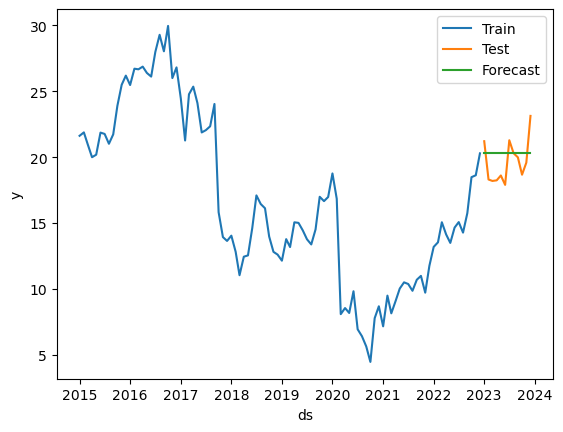

In [19]:
sns.lineplot(train[train['unique_id'] == 'GENTERA.MX'], x="ds", y="y", label="Train") 
sns.lineplot(test[test['unique_id'] == 'GENTERA.MX'], x="ds", y="y", label="Test") 
sns.lineplot(test_hat[test_hat.index == 'GENTERA.MX'], x="ds", y="AutoETS", label="Forecast",)
plt.show()

In [20]:
sf.fitted_[14,0].model_['method']

'ETS(M,N,N)'

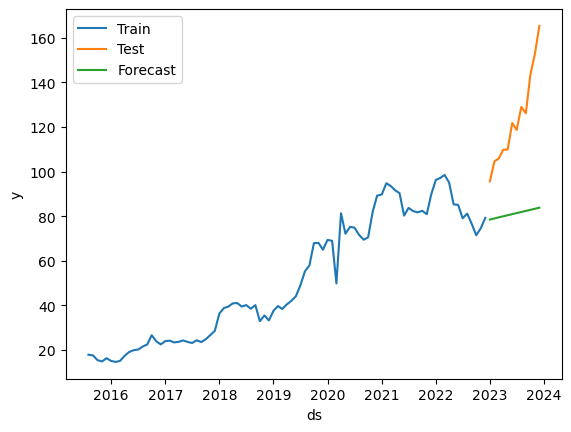

In [22]:
sns.lineplot(train[train['unique_id'] == 'Q.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'Q.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'Q.MX'], x="ds", y="AutoETS", label="Forecast",)
plt.show()

Vemos como con alugas de las series de tiempo el modelo AutoETS es un buen predictor para las series de tiempo. Sien embargo en otros casos no es tan util dado que vemos como en modelos en los que hay estacionalidad ni tendencia no se muy buena manera 